---
title: "Lab 03: TimeGPT"
---


In [1]:
import os
from dotenv import load_dotenv
from nixtla import NixtlaClient
import pandas as pd

load_dotenv()

nixtla_client = NixtlaClient(api_key=os.getenv("NIXTLA_KEY"))

In [2]:
nixtla_client.validate_api_key()

INFO:nixtla.nixtla_client:Happy Forecasting! :)


True

In [3]:
df_intermediario = pd.read_csv("../data/dados_amostra.csv", header=None, names=["id", "y"])
# transform ds column to date starting on 2018-01-01 and daily frequency
df_intermediario["ds"] = pd.date_range(start="2018-04-01", periods=len(df_intermediario), freq="D")
df_intermediario.head()

,id,y,ds
0,1,9580.0,2018-04-01
1,2,9380.0,2018-04-02
2,3,9450.0,2018-04-03
3,4,9490.0,2018-04-04
4,5,9740.0,2018-04-05


In [4]:
df_intermediario.shape

(1062, 3)

In [5]:
fcast = nixtla_client.forecast(
    df=df_intermediario,
    h=18,
    time_col="ds",
    target_col="y",
    freq="D"
)

INFO:nixtla.nixtla_client:Validating inputs...
c:\Users\jtrec\Documents\insper\202534-fa\.venv\Lib\site-packages\nixtla\nixtla_client.py:380: UserWarning: `df` contains the following exogenous features: ['id'], but `X_df` was not provided and they were not declared in `hist_exog_list`. They will be ignored.
  warnings.warn(
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Querying model metadata...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


In [6]:
fcast

,ds,TimeGPT
0,2021-02-26,9395.520
1,2021-02-27,9374.905
2,2021-02-28,9370.457
3,2021-03-01,9380.596
4,2021-03-02,9394.539
5,2021-03-03,9391.961
6,2021-03-04,9387.700
7,2021-03-05,9395.285
8,2021-03-06,9406.790
9,2021-03-07,9417.757


In [7]:
# transform column ds back to integer
fcast['id'] = (fcast['ds'] - pd.Timestamp("2018-04-01")).dt.days
fcast['y'] = fcast['TimeGPT']
fcast[['id', 'y']].to_csv("../data/forecast_timegpt.csv", index=False)

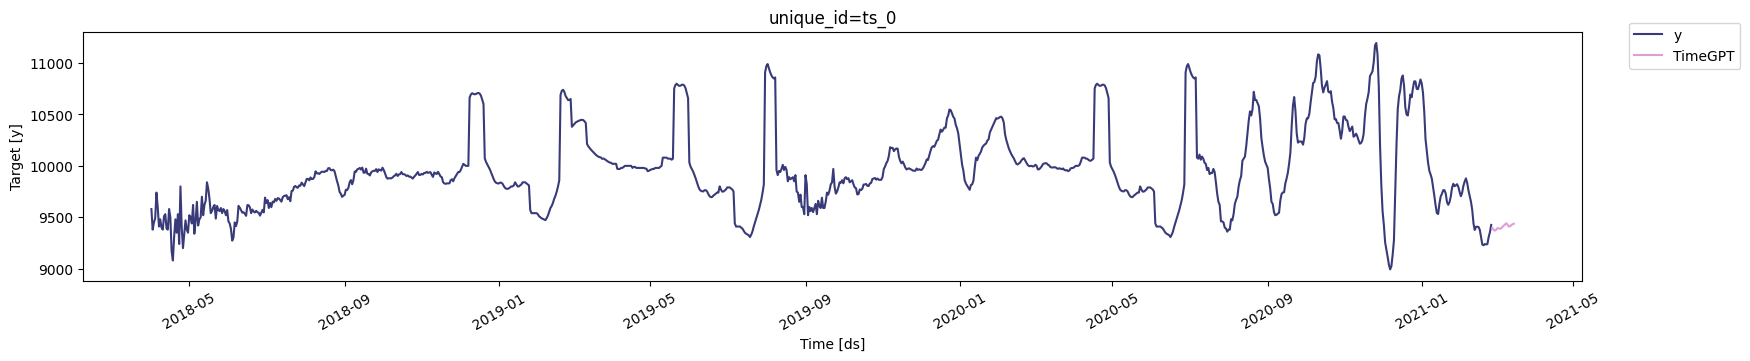

In [8]:
fcast_pred = fcast[['ds', 'TimeGPT']].copy()
df_intermediario_plot = df_intermediario[['ds', 'y']].copy()
nixtla_client.plot(
    df_intermediario_plot, 
    fcast_pred, 
    time_col="ds", 
    target_col="y"
)
